In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from skimage import io,transform

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

from sklearn.model_selection import train_test_split

from PIL import Image

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


## 读取图片


In [2]:
import os
import cv2

 # this if for store all of the image data
# this function is for read image,the input is directory name




In [43]:
names = ['咖啡粉','水','牛奶','无糖可乐','可乐','纸巾']

In [4]:
def import_images(name):
    string1 = 'data/'+name
    string2 = string1+'/'
    
    new_train = []
    image_list=os.listdir(string1)
    for filename in image_list:
        img = cv2.imread(string2 + filename)
        try: 
#             img=transform.resize(img,(200,200,3))
            img = img.astype('float32')/255.0
            new_train.append(img)
        except:
            pass
    print(name+" Done!")
    return np.array(new_train)

In [5]:
def make_data():
    train_data = np.vstack((coffee,water,milk,coke,coke2,napkin))
    print("train done!")
    
    labels = list(np.zeros(coffee.shape[0]))
    print("1 done!")
    labels.extend(list(np.ones(water.shape[0])))
    print("2 done!")
    labels.extend(list(np.ones(milk.shape[0])*2))
    print("3 done!")
    labels.extend(list(np.ones(coke.shape[0])*3))
    print("4 done!")
    labels.extend(list(np.ones(coke2.shape[0])*4))
    print("5 done!")
    labels.extend(list(np.ones(napkin.shape[0])*5))
    print("6 done!")
    labels = np.array(labels)
    
    return train_data,labels
    

In [7]:
'''napkin = import_images('NapKin')
water = import_images('Water')
milk = import_images('Milk')
coke = import_images('Coke')
coffee = import_images('Coffee')
coke2 = import_images('Coke2')

train_data,labels= make_data()

num_example=train_data.shape[0]
arr=np.arange(num_example)
np.random.shuffle(arr)
new_train_data=train_data[arr]
new_labels=labels[arr]

ratio=0.67
s=np.int(num_example*ratio)

X_train = new_train_data[0:s]
y_train = new_labels[0:s]
X_test = new_train_data[s:]
y_test = new_labels[s:]


np.save("X_train",X_train)
np.save("X_test",X_test)
np.save("y_train",y_train)
np.save("y_test",y_test)''';

In [9]:
X_train= np.load("X_train.npy")
X_test= np.load("X_test.npy")
y_train= np.load("y_train.npy")
y_test= np.load("y_test.npy")

### 数据格式 

In [10]:
X_train.shape

(2692, 480, 640, 3)

In [11]:
X_test.shape

(1326, 480, 640, 3)

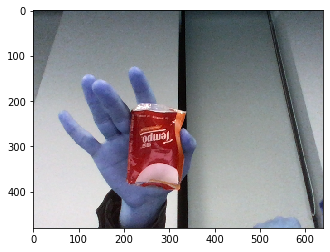

In [12]:
plt.imshow(X_train[0])

## Model

In [13]:
def new_test(model):
    test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

model 1

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(480, 640, 3)),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [40]:
model.fit(X_train, y_train, epochs=5)

Train on 2692 samples
Epoch 1/5
2692/2692 [==============================] - 183s 68ms/sample - loss: 1.9770 - acc: 0.2028
Epoch 2/5
2692/2692 [==============================] - 150s 56ms/sample - loss: 1.7174 - acc: 0.2697
Epoch 3/5
2692/2692 [==============================] - 158s 59ms/sample - loss: 1.6224 - acc: 0.3143
Epoch 4/5
2692/2692 [==============================] - 178s 66ms/sample - loss: 1.5206 - acc: 0.3217
Epoch 5/5
2692/2692 [==============================] - 161s 60ms/sample - loss: 1.4697 - acc: 0.3258


In [ ]:
new_test(model)

Model2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(480, 640, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(6, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, epochs=5)

In [ ]:
new_test(model2)

Model3

In [ ]:
new_test(baseline_model)

## Model 4

In [14]:
model4 = Sequential([
    Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu',input_shape=(480, 640, 3)),
    Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu'),
    # 池化层,池化核大小２x2,
    MaxPooling2D(pool_size=(2,2)),
    # 随机丢弃四分之一的网络连接，防止过拟合
    Dropout(0.25),
    Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    # 全连接层,展开操作，
    Flatten(),
    # 添加隐藏层神经元的数量和激活函数
    Dense(256, activation='relu'),
    Dropout(0.25),
    # 输出层
    Dense(6, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model4.fit(X_train, y_train, epochs=5)

Train on 2692 samples
Epoch 1/5
2692/2692 [==============================] - 2737s 1s/sample - loss: 5.3809 - acc: 0.8600
Epoch 2/5
2692/2692 [==============================] - 1630s 605ms/sample - loss: 0.0019 - acc: 0.9996
Epoch 3/5
2692/2692 [==============================] - 1631s 606ms/sample - loss: 7.3212e-04 - acc: 0.9996
Epoch 4/5
2692/2692 [==============================] - 1657s 615ms/sample - loss: 0.0017 - acc: 0.9993
Epoch 5/5
2692/2692 [==============================] - 1621s 602ms/sample - loss: 0.0012 - acc: 0.9996


In [16]:
model4.save("CNN")

In [17]:
new_test(model4)

1326/1326 - 117s - loss: 0.0029 - acc: 0.9985

Test accuracy: 0.9984917


## Prediction 

In [19]:
predictions = model4.predict(X_test)

In [20]:
predictions[0]

array([3.4588513e-07, 5.5447380e-08, 6.0285648e-09, 9.9999905e-01,
       1.7371210e-09, 5.7462080e-07], dtype=float32)

In [21]:
print(names[np.argmax(predictions[99])])

牛奶


## Use

In [ ]:
def plot_image(id predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

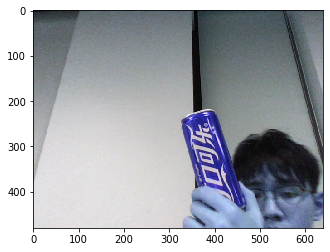

In [34]:
img = cv2.imread('data/使用/Test.png')

# img=transform.resize(img,(100,100))
# img = img.astype('float32')/255.0
plt.imshow(img)     

In [44]:
img_to_predict = (np.expand_dims(img,0))
predictions_single = model4.predict(img_to_predict)
print(predictions_single)
print(names[np.argmax(predictions_single)])

[[0. 0. 0. 0. 1. 0.]]
可乐


## CV2 Use 

In [ ]:
plt.imshow(img)

In [ ]:
plt.grid(False)
plt.xticks(range(4))
plt.yticks([])
thisplot = plt.bar(range(4), predictions_single, color="#777777")
plt.ylim([0, 1])

In [ ]:
# img_ = X_test[30]
# img_ = (np.expand_dims(img_,0))
# predictions_single_ = model.predict(img_)

# plot_value_array(1, predictions_single_[0], y_test)
# _ = plt.xticks(range(4),names, rotation=45)